# Stochastic Differential Equations

**February 10, 2023**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simplistic View of SDEs

Consider the simplest ordinary differential equation $x' = a x$ and let's look at different ways to add noise $\xi(t)$ to the system.

**Example 1.** Add noise to the growth parameter $a$ to get a first order SDE

\begin{align*}
x' &= (a + \xi(t))x \\
dX &= aXdt + X \xi(t)dt \\
dX &= aXdt + X dW(t)
\end{align*}

**Example 2.** Add noise to the spatial coordinate $x + \xi(t)$ to get a first order SDE

\begin{align*}
x' &= a(x + \xi(t)) \\
dX &= aXdt + a \xi(t) dt \\
dX &= aXdt + adW(t)
\end{align*}

## Visualizing Noise

The term $\xi(t)$ is a continuously varying, normally distributed random variable. We can think of it discretely. Choose a time period $T>0$ and integer $N$ and let $\delta t = T/N$. Then $\xi(t_j) \in \mathcal{N}(\mu,\sigma^2)$ for each $t_j = j \delta t$ and then we can connect the dots to create a continuous $\xi(t)$.

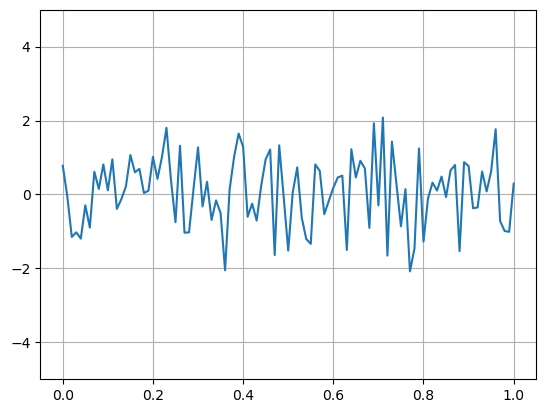

In [2]:
T = 1; N = 100; sigma = 1; mu = 0;
t = np.linspace(0,T,N+1)
noise = sigma*np.random.randn(N+1) + mu
plt.plot(t,noise), plt.ylim([-5,5]), plt.grid(True)
plt.show()

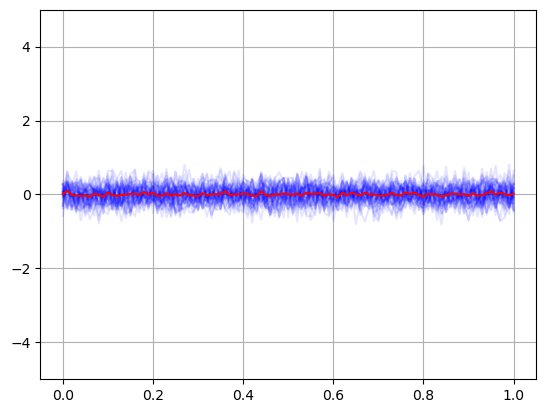

In [3]:
N = 100; npaths = 50; sigma = 0.25; mu = 0;
t = np.linspace(0,T,N+1)
noise = sigma*np.random.randn(N+1,npaths) + mu
plt.plot(t,noise,'b-',alpha=0.1)
plt.plot(t,noise.mean(axis=1),'r-'), plt.ylim([-5,5]), plt.grid(True)
plt.show()

## Discretized Brownian Motion (aka Wiener Process)

Choose time period $T>0$ and integer $N$ and let $\delta t = T/N$. A discretized Brownian motion is

$$
W_0 = 0 \ , \ \ W_j = W_{j-1} + dW_j \hspace{5mm} \text{for} \hspace{5mm} j=1,\dots,N
$$

where $dW_j \in \sqrt{\delta t} \, \mathcal{N}(0,1)$.

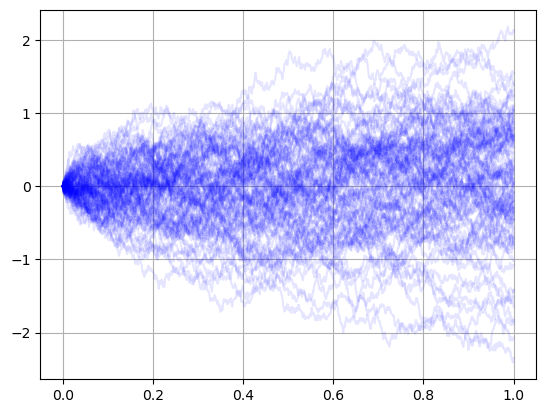

In [4]:
T = 1; N = 1000; dt = T/N; sigma = np.sqrt(dt); mu = 0; npaths = 100;
dW = sigma*np.random.randn(N,npaths) + mu
W = np.vstack([np.zeros(npaths),dW.cumsum(axis=0)])
t = np.linspace(0,T,N+1)
plt.plot(t,W,'b-',alpha=0.1), plt.grid(True)
plt.show()

The value of each path at time $t$ is normally distributed with mean 0 and the variance increases over time:

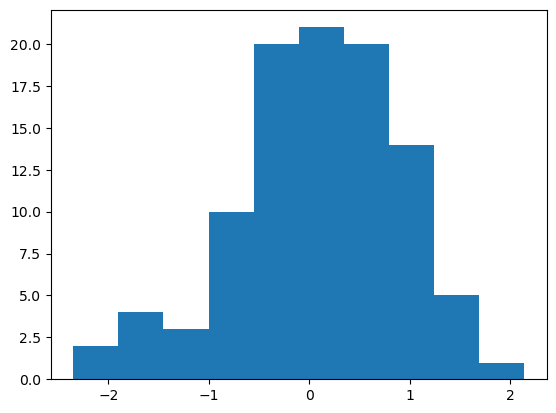

In [5]:
plt.hist(W[-1,:])
plt.show()

## Stochastic Integrals

$$
\int_0^T W(t) dW(t) \approx \sum_{j=0}^{N-1} W_j(W_{j+1} - W_j)
$$

In [6]:
T = 1; N = 1000; dt = T/N;
dW = np.sqrt(dt)*np.random.randn(N,1)
W = np.vstack([np.zeros(1),dW.cumsum(axis=0)])
t = np.linspace(0,T,N+1)
ito = np.sum(W[:-1]*(W[1:] - W[:-1]))
ito

-0.46982525247833046

## Numerical Methods for SDEs

$$
X(t) = X_0 + \int_0^t f(X(s)) ds + \int_0^t g(X(s)) dW(s) \ , \ \ 0 \leq t \leq T
$$

$$
dX(t) = f(X(t))dt + g(X(t)) dW(t) \ , \ \ X(0) = X_0 \ , \ \ 0 \leq t \leq T
$$

Let $\Delta t = T/L = R\delta t = R T/N$ so $L = N/R \in \mathbb{Z}$. Let $\tau_j = j \Delta t$ and $X_j = X(\tau_j)$.

$$
X_j = X_{j-1} + f(X_{j-1})\Delta \tau + g(X_{j-1})(W(\tau_j) - W(\tau_{j-1}))
$$

When $f(X) = aX$ and $g(X) = bX$, the exact solution is

$$
X(t) = X(0) \exp((a - b^2/2)t + bW(t))
$$

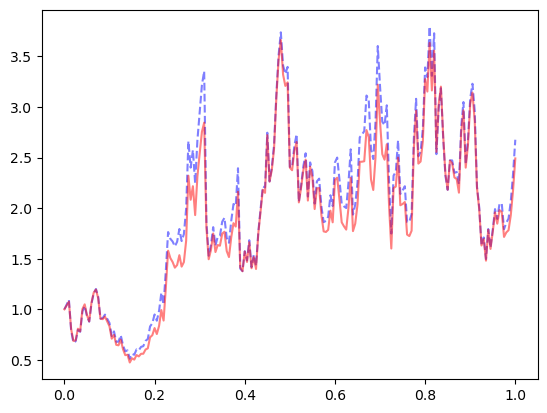

In [11]:
T = 1; N = 1000; dt = T/N; R = 5; dtau = R*dt; L = N//R;
dW = np.sqrt(dt)*np.random.randn(N,1)
W = np.vstack([np.zeros(1),dW.cumsum(axis=0)])
t = np.linspace(0,T,L+1)
X = np.zeros(L+1)
a = 1; b = 2;
X[0] = 1
for j in range(1,L+1):
    X[j] = X[j-1] + a*X[j-1]*dtau + b*X[j-1]*(W[j*R] - W[(j-1)*R])
Xtrue = X[0]*np.exp((a - b**2/2)*t + b*W[range(0,N+1,R),:].flatten())
plt.plot(t,X,'b--',t,Xtrue,'r',alpha=0.5)
plt.show()